# Bitbrains Dataset Exploration

In [3]:
from pandas import read_csv
import matplotlib. pyplot as plt
import os

In [2]:
# Change path to your dataset location
import os
cwd = os.getcwd()  # Get the current working directory (cwd)
files = os.listdir(r'../Datasets/fastStorage/2013-8')  # Get all the files in that directory
print("Files in %r: %s" % (cwd, files))

Files in 'C:\\Users\\Javier Galindos\\OneDrive - Fundación IMDEA Software\\Documents\\Code\\intern-project-javier\\DataExploration': ['1.csv', '10.csv', '100.csv', '1000.csv', '1001.csv', '1002.csv', '1003.csv', '1004.csv', '1005.csv', '1006.csv', '1007.csv', '1008.csv', '1009.csv', '101.csv', '1010.csv', '1011.csv', '1012.csv', '1013.csv', '1014.csv', '1015.csv', '1016.csv', '1017.csv', '1018.csv', '1019.csv', '102.csv', '1020.csv', '1021.csv', '1022.csv', '1023.csv', '1024.csv', '1025.csv', '1026.csv', '1027.csv', '1028.csv', '1029.csv', '103.csv', '1030.csv', '1031.csv', '1032.csv', '1033.csv', '1034.csv', '1035.csv', '1036.csv', '1037.csv', '1038.csv', '1039.csv', '104.csv', '1040.csv', '1041.csv', '1042.csv', '1043.csv', '1044.csv', '1045.csv', '1046.csv', '1047.csv', '1048.csv', '1049.csv', '105.csv', '1050.csv', '1051.csv', '1052.csv', '1053.csv', '1054.csv', '1055.csv', '1056.csv', '1057.csv', '1058.csv', '1059.csv', '106.csv', '1060.csv', '1061.csv', '1062.csv', '1063.csv', '1

In [19]:
# Read time series
series = read_csv('../Datasets/fastStorage/2013-8/10.csv',sep=';\t', index_col=0, parse_dates=True, squeeze=True, engine='python')

In [22]:
# Create new variable memory usage in %
series['Memory usage [%]'] = series['Memory usage [KB]'] * 100 / series['Memory capacity provisioned [KB]']
# Avoid dision by 0
series['Memory usage [%]'] = series['Memory usage [%]'].fillna(0)

In [14]:
# Parse time
time = series.index[len(series)-1] - series.index[0]
time_seg = time / 1000
time_min = time_seg / 60
print(time_min)

43.199200000000005


In [5]:
# CPU utilization
%matplotlib qt
CPU_plt = series['CPU usage [%]'].plot()
CPU_plt.set_ylabel("CPU usage [%]")
CPU_plt.set_title('CPU usage')
plt.show()

In [6]:
# Memory utilization
memory_plt = series['Memory usage [%]'].plot()
memory_plt.set_ylabel("Memory usage [%]")
memory_plt.set_title('Memory usage')
plt.show()

## Generate a Figure per VM

## CPU Utilization

In [8]:
# CPU utilization
# New figure each VMs
# Get all the series
dataset_path = r'../Datasets/fastStorage/2013-8'
figures_path = '../Figures/DataExploration/CPU_utilization'
files = os.listdir(dataset_path)  # Get all the files in that directory

for idx,serie in enumerate(files):
    VM_path = os.path.join(dataset_path, serie)
    # Read time series of each Virtual Machine (VM)
    VM = read_csv(VM_path,sep=';\t', index_col=0, parse_dates=True, squeeze=True, engine='python')
    # Create new variable memory usage in %
    # VM['Memory usage [%]'] = VM['Memory usage [KB]'] * 100 / VM['Memory capacity provisioned [KB]']
    fig = plt.figure(figsize=(10, 5), dpi=150)
    #plt.ion()
    VM['CPU usage [%]'].plot()
    plt.title('CPU usage')
    plt.ylabel("CPU usage [%]")
    plt.title('CPU usage %s' %str(idx))
    save_path = os.path.join(figures_path,"VM%s"%str(idx))
    plt.savefig(save_path, bbox_inches='tight')
    plt.close(fig)

### Memory utilization

In [10]:
# Memory utilization
# New figure each VM
# Get all the series
dataset_path = r'../Datasets/fastStorage/2013-8'
figures_path = '../Figures/DataExploration/memory_utilization'
files = os.listdir(dataset_path)  # Get all the files in that directory
for idx,serie in enumerate(files):
    VM_path = os.path.join(dataset_path, serie)
    # Read time series of each Virtual Machine (VM)
    VM = read_csv(VM_path,sep=';\t', index_col=0, parse_dates=True, squeeze=True, engine='python')
    # Create new variable memory usage in %
    VM['Memory usage [%]'] = VM['Memory usage [KB]'] * 100 / VM['Memory capacity provisioned [KB]']
    # Avoid dision by 0
    VM['Memory usage [%]'] = VM['Memory usage [%]'].fillna(0)
    fig = plt.figure(figsize=(10, 5), dpi=150)
    VM['Memory usage [%]'].plot(color= 'orange')
    plt.ylabel('Memory usage [%]')
    plt.ylim((0,125))
    plt.title('Memory usage %s' %str(idx))
    save_path = os.path.join(figures_path,"VM%s"%str(idx))
    plt.savefig(save_path, bbox_inches='tight')
    plt.close(fig)

## Duration of jobs

In [14]:
import numpy as np
# Get all the series
dataset_path = r'../Datasets/fastStorage/2013-8'
files = os.listdir(dataset_path)  # Get all the files in that directory
duration_jobs = np.zeros(len(files))
for idx,serie in enumerate(files):
    VM_path = os.path.join(dataset_path, serie)
    # Read time series of each Virtual Machine (VM)
    VM = read_csv(VM_path,sep=';\t', index_col=0, parse_dates=True, squeeze=True, engine='python')
    # Parse time
    time = (VM.index[len(VM)-1] - VM.index[0]) / (1000*60)
    duration_jobs[idx] = time

# Generate plot
fig = plt.figure(figsize=(10, 5), dpi=150)
plt.bar(np.arange(1250),duration_jobs)
plt.title("Duration of jobs")
plt.xlabel('Virtual machine')
plt.ylabel('Duration job [min]')
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

<Figure size 1500x750 with 0 Axes>

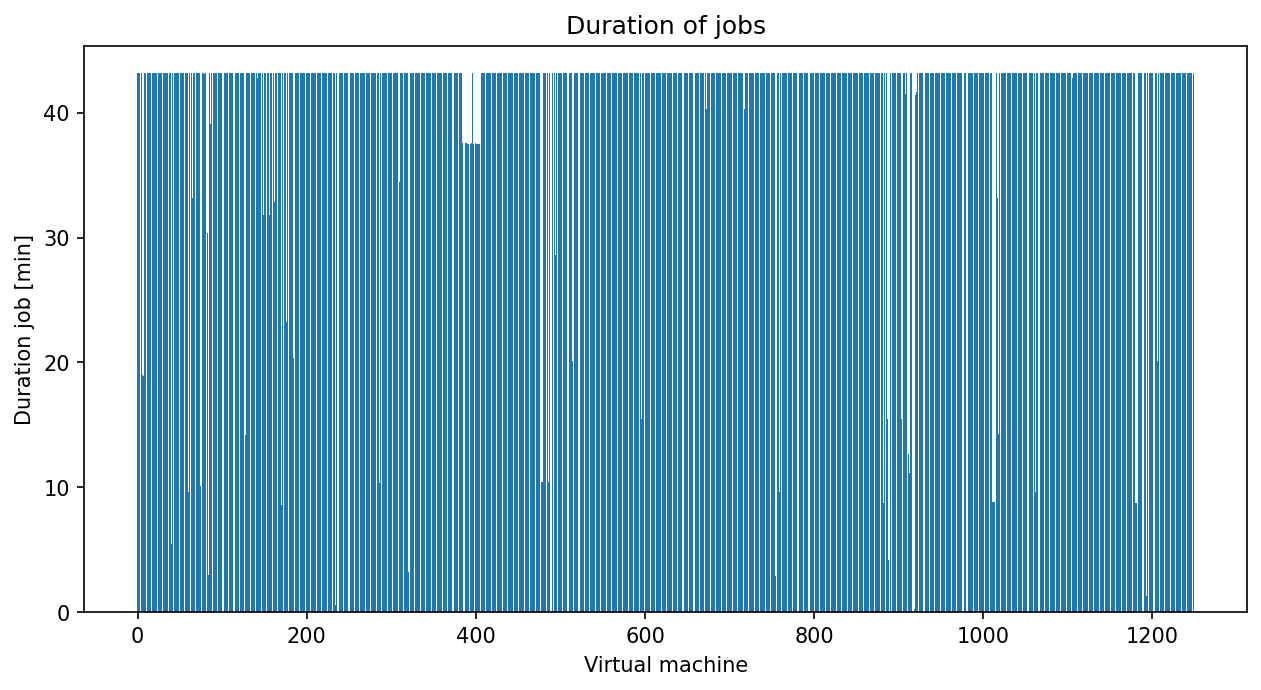

In [20]:
# Generate plot
fig = plt.figure(figsize=(10, 5), dpi=150)
plt.bar(np.arange(1250),duration_jobs)
plt.title("Duration of jobs")
plt.xlabel('Virtual machine')
plt.ylabel('Duration job [min]')
plt.show()

## Check for duplicates

In [27]:
VM_path = '../Datasets/fastStorage/2013-8/10.csv'
VM = read_csv(VM_path,sep=';\t', index_col=0, parse_dates=True, squeeze=True, engine='python')
print(VM.shape)
print(len(VM.index.unique()))
duplicated =VM[VM.index.duplicated(keep=False)]

(16140, 10)
12340


In [31]:
# Group by index and average
VM = VM.groupby(VM.index).mean()
VM.index.has_duplicates

False

## Data center dataframe

In [4]:
import pandas as pd
import numpy as np

In [20]:
nrow = 8634
CPU_utilization = np.zeros([nrow,])
CPU_MHz = np.zeros([nrow,])
memory_utilization = np.zeros([nrow,])
memory_KB = np.zeros([nrow,])
# Get all the series
dataset_path = r'../Datasets/fastStorage/2013-8'
files = os.listdir(dataset_path)  # Get all the files in that directory
for serie in files:
    VM_path = os.path.join(dataset_path, serie)
    # Read time series of each Virtual Machine (VM)
    VM = read_csv(VM_path,sep=';\t', index_col=0, parse_dates=True, squeeze=True, engine='python')
    # CPU
    CPU_utilization = np.add(CPU_utilization, VM['CPU usage [%]'].to_numpy()) # Element-wise sum
    CPU_MHz = np.add(CPU_MHz, VM['CPU usage [MHZ]'].to_numpy())
    # Memory
    VM['Memory usage [%]'] = VM['Memory usage [KB]'] * 100 / VM['Memory capacity provisioned [KB]']
    memory_utilization = np.add(memory_utilization, VM['Memory usage [%]'].to_numpy())
    memory_KB = np.add(memory_KB, VM['Memory usage [KB]'].to_numpy())

# Create datacenter dataframe
DataCenter = pd.DataFrame({'CPU usage [%]':     CPU_utilization,
                           'CPU usage [MHZ]':   CPU_MHz,
                           'Memory usage [%]':  memory_utilization,
                           'Memory usage [KB]': memory_KB
                           })

KeyboardInterrupt: 

In [33]:
VM = read_csv(r'../Datasets/fastStorage/2013-8/1.csv',sep=';\t', index_col=0, parse_dates=True, squeeze=True, engine='python')

In [13]:
print(min(VM.index),max(VM.index))
print(len(VM.index.unique()))

NameError: name 'VM' is not defined

In [30]:
# VM have different length (shape)
# Get all the series
dataset_path = r'../Datasets/fastStorage/2013-8'
files = os.listdir(dataset_path)  # Get all the files in that directory
for serie in files:
    VM_path = os.path.join(dataset_path, serie)
    # Read time series of each Virtual Machine (VM)
    VM = read_csv(VM_path,sep=';\t', index_col=0, parse_dates=True, squeeze=True, engine='python')
    print(VM.shape)

(8634, 10)
(16140, 10)
(20255, 10)
(8640, 10)
(8640, 10)
(8640, 10)
(3791, 10)
(3787, 10)
(8640, 10)
(8640, 10)
(8640, 10)
(8612, 10)
(8616, 10)
(20255, 10)
(8614, 10)
(8636, 10)
(8633, 10)
(8635, 10)
(8636, 10)
(8636, 10)
(8635, 10)
(8634, 10)
(8636, 10)
(8636, 10)
(8617, 10)
(8633, 10)
(8632, 10)
(8636, 10)
(8633, 10)
(8615, 10)
(8615, 10)
(8616, 10)
(8636, 10)
(8633, 10)
(8635, 10)
(20258, 10)
(8636, 10)
(8636, 10)
(8636, 10)
(8636, 10)
(1096, 10)
(8636, 10)
(8635, 10)
(8634, 10)
(8632, 10)
(8617, 10)
(20259, 10)
(8615, 10)
(8636, 10)
(8617, 10)
(8634, 10)
(8632, 10)
(8634, 10)
(8635, 10)
(8635, 10)
(8613, 10)
(8617, 10)
(8618, 10)
(8618, 10)
(8613, 10)
(1926, 10)
(8617, 10)
(8537, 10)
(8632, 10)
(8631, 10)
(6608, 10)
(8615, 10)
(8615, 10)
(8611, 10)
(8619, 10)
(8635, 10)
(8636, 10)
(8616, 10)
(8617, 10)
(2016, 10)
(8616, 10)
(8618, 10)
(8634, 10)
(8616, 10)
(8602, 10)
(8616, 10)
(8616, 10)
(8615, 10)
(6073, 10)
(596, 10)
(8633, 10)
(7801, 10)
(8616, 10)
(4073, 10)
(8616, 10)
(8616,

In [38]:
# VM have different length (index)
# Get all the series
dataset_path = r'../Datasets/fastStorage/2013-8'
files = os.listdir(dataset_path)  # Get all the files in that directory
for serie in files:
    VM_path = os.path.join(dataset_path, serie)
    # Read time series of each Virtual Machine (VM)
    VM = read_csv(VM_path,sep=';\t', index_col=0, parse_dates=True, squeeze=True, engine='python')
    print(min(VM.index),max(VM.index))

1376314846 1378906798
1376314846 1378906798
1376314846 1378906798
1376314846 1378906798
1376314846 1378906798
1376314846 1378906798
1377769691 1378906798
1377770591 1378906798
1376314846 1378906798
1376314846 1378906798
1376314846 1378906798
1376314846 1378906798
1376314846 1378906798
1376314846 1378906798
1376314846 1378906798
1376314846 1378906798
1376314846 1378906798
1376314846 1378906798
1376314846 1378906798
1376314846 1378906798
1376314846 1378906798
1376314846 1378906798
1376314846 1378906798
1376314846 1378906798
1376314846 1378906798
1376314846 1378906798
1376314846 1378906798
1376314846 1378906798
1376314846 1378906798
1376314846 1378906798
1376314846 1378906798
1376314846 1378906798
1376314846 1378906798
1376314846 1378906798
1376314846 1378906798
1376314846 1378906798
1376314846 1378906798
1376314846 1378906798
1376314846 1378906798
1376314846 1378906798
1376314846 1376643375
1376314846 1378906798
1376314846 1378906798
1376314846 1378906798
1376314846 1378906798
1376314846

In [46]:
# VM have different length (unique index)
# Get all the series
dataset_path = r'../Datasets/fastStorage/2013-8'
files = os.listdir(dataset_path)  # Get all the files in that directory
for serie in files:
    VM_path = os.path.join(dataset_path, serie)
    # Read time series of each Virtual Machine (VM)
    VM = read_csv(VM_path,sep=';\t', index_col=0, parse_dates=True, squeeze=True, engine='python')
    print(len(VM.index.unique()))

8634
12340
14405
8640
8640
8640
3791
3787
8640
8640
8640
8612
8616
14405
8614
8636
8633
8635
8636
8636
8635
8634
8636
8636
8617
8633
8632
8636
8633
8615
8615
8616
8636
8633
8635
14408
8636
8636
8636
8636
1096
8636
8635
8634
8632
8617
14409
8615
8636
8617
8634
8632
8634
8635
8635
8613
8617
8618
8618
8613
1926
8617
8537
8632
8631
6608
8615
8615
8611
8619
8635
8636
8616
8617
2016
8616
8618
8634
8616
8602
8616
8616
8615
6073
596
8633
7801
8616
4073
8616
8616
8616
8619
8616
8619
8631
8636
8620
8613
8616
8617
8616
8619
8636
8635
8634
8635
8616
8617
8635
8632
8635
8635
8619
8619
8617
8632
8634
8632
8635
8637
8637
8635
8637
8616
8636
8632
8614
2832
8635
8616
8632
8618
8615
8615
8610
8613
8635
8612
8616
8616
8616
8539
8635
8635
8637
8344
8634
8636
6358
8636
8635
8636
8616
8634
8618
6342
8616
8617
8633
8616
8635
6564
8637
8619
8633
8615
8632
8616
8612
1709
8633
8635
8635
8636
8635
4631
8629
8635
8617
8619
8629
8616
8616
4076
8619
8618
8612
8635
8635
8619
8635
8632
8635
8617
8636
8636
8633
8618
8